In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Preparation

In [43]:
mouse_metadata_path = r"C:\Users\quaid\OneDrive\Desktop\Week_5-challenge\Starter_Code (1)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\quaid\OneDrive\Desktop\Week_5-challenge\Starter_Code (1)\Starter_Code\Pymaceuticals\data\Study_results.csv"

In [44]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results= pd.read_csv(study_results_path)
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [45]:
num_unique_mice = merged_df['Mouse ID'].nunique()
print(f"Number of unique mice: {num_unique_mice}")

Number of unique mice: 249


In [46]:
duplicate_time_points = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_time_points)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [47]:
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
updated_num_unique_mice = cleaned_df['Mouse ID'].nunique()
print(f"Updated number of unique mice after cleaning: {updated_num_unique_mice}")

Updated number of unique mice after cleaning: 249


Summary Statistics

In [48]:
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
print(summary_stats)


                   mean     median   variance   std_dev       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


Create Bar Charts and Pie Charts

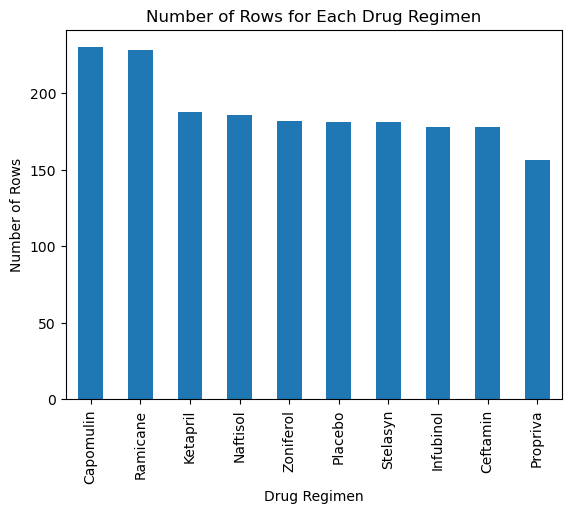

In [49]:
bar_chart1 = cleaned_df['Drug Regimen'].value_counts().plot(kind='bar', title="Number of Rows for Each Drug Regimen")
plt.ylabel('Number of Rows')
plt.show()


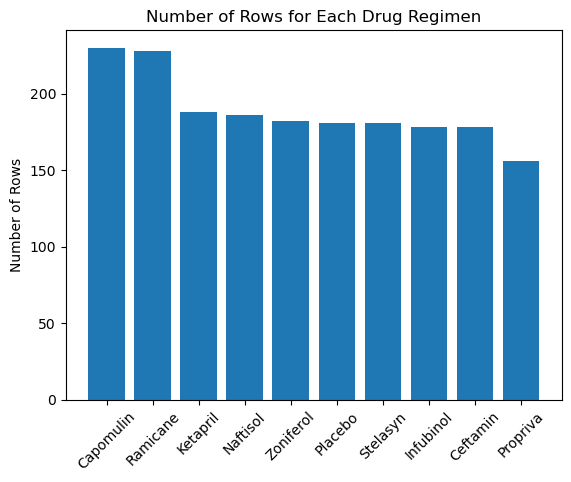

In [50]:
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title("Number of Rows for Each Drug Regimen")
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()


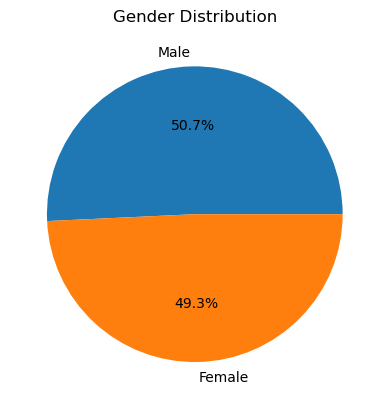

In [51]:
gender_distribution = cleaned_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution")
plt.ylabel('')
plt.show()



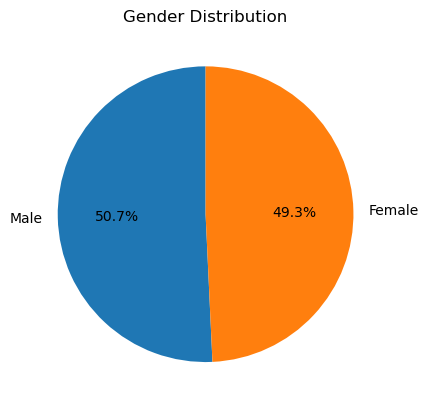

In [52]:
# Create a pie chart for gender distribution using Matplotlib
gender_counts = cleaned_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()


Calculate Quartiles, Find Outliers, and Create a Box Plot

In [53]:
final_timepoint_df = cleaned_df.groupby('Mouse ID').last()
merged_final_df = pd.merge(final_timepoint_df, cleaned_df, on=["Mouse ID", "Timepoint"])
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []
for treatment in treatments:
    treatment_data = merged_final_df[merged_final_df['Drug Regimen_x'] == treatment]['Tumor Volume (mm3)_x']
    tumor_volumes.append(treatment_data)
for i, treatment in enumerate(treatments):
    tumor_volume = tumor_volumes[i]
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    print(f"{treatment} treatment:")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]}")


Capomulin treatment:
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane treatment:
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol treatment:
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_x, dtype: float64
Ceftamin treatment:
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


C:\Users\quaid\AppData\Local\Temp\ipykernel_41776\2972707080.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True)


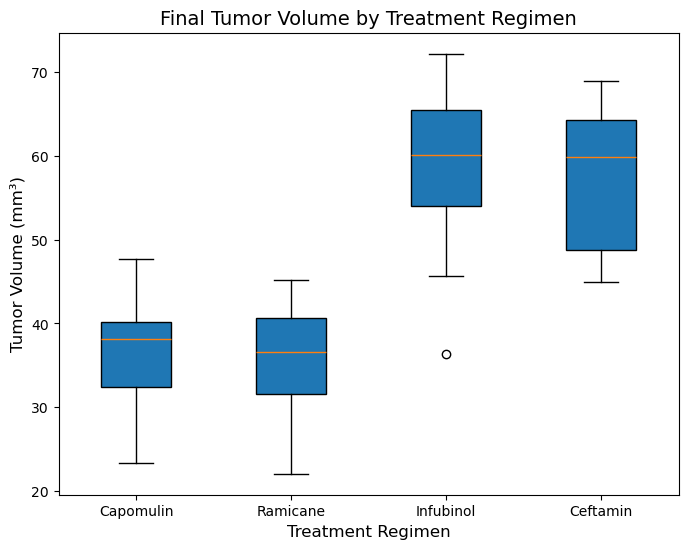

In [54]:
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True)
plt.title("Final Tumor Volume by Treatment Regimen", fontsize=14)
plt.xlabel("Treatment Regimen", fontsize=12)
plt.ylabel("Tumor Volume (mm³)", fontsize=12)
plt.show()

Create a Line Plot and a Scatter Plot

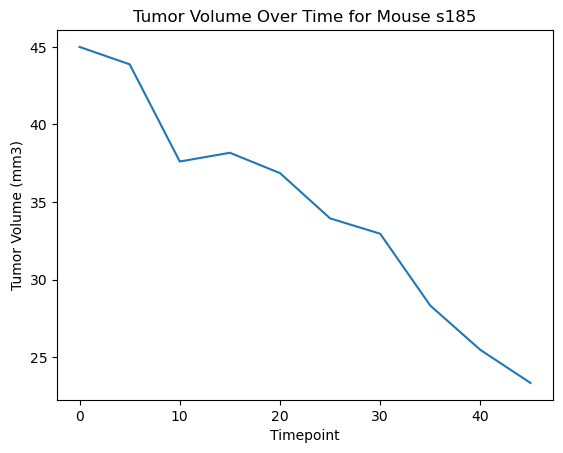

In [55]:
capomulin_mouse = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin'].iloc[0]['Mouse ID']
mouse_data = cleaned_df[cleaned_df['Mouse ID'] == capomulin_mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title(f"Tumor Volume Over Time for Mouse {capomulin_mouse}")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Calculate Correlation and Regression

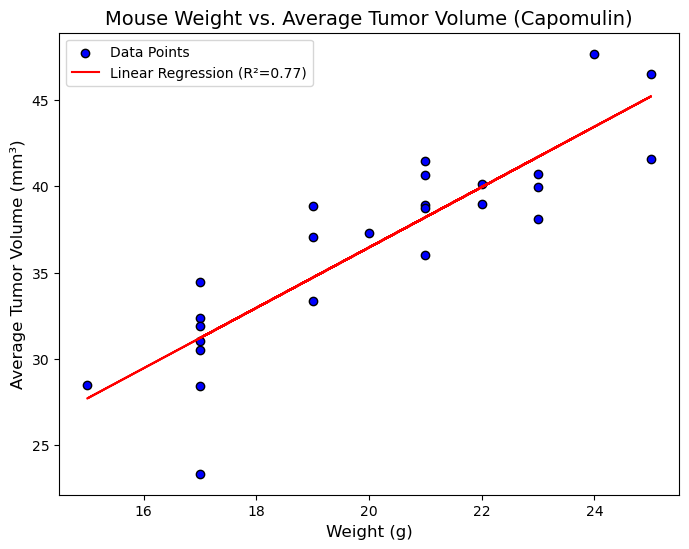

Correlation Coefficient: 0.88


In [58]:
from scipy.stats import linregress
capomulin_data = merged_final_df[merged_final_df['Drug Regimen_x'] == 'Capomulin']
numeric_columns = ['Weight (g)_x', 'Tumor Volume (mm3)_x']
capomulin_grouped = capomulin_data[numeric_columns].groupby(capomulin_data['Mouse ID']).mean()
x_values = capomulin_grouped['Weight (g)_x']
y_values = capomulin_grouped['Tumor Volume (mm3)_x']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regression_line = slope * x_values + intercept
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', edgecolor='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label=f'Linear Regression (R²={r_value**2:.2f})')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm³)", fontsize=12)
plt.legend()
plt.show()
print(f"Correlation Coefficient: {r_value:.2f}")


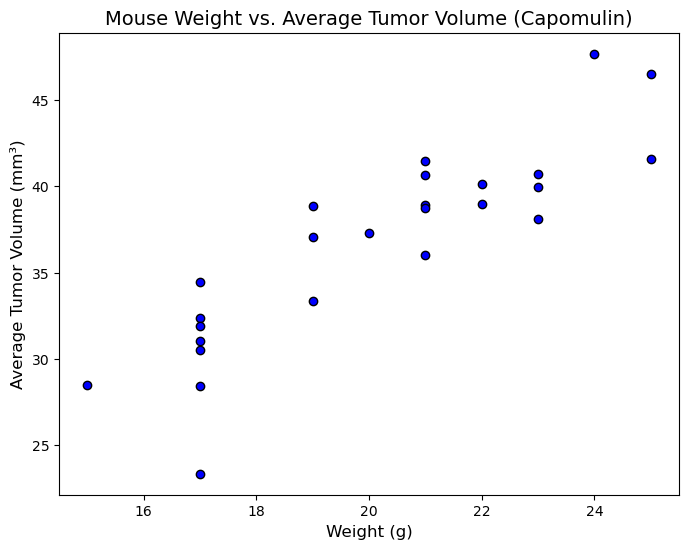

In [57]:
capomulin_data = merged_final_df[merged_final_df['Drug Regimen_x'] == 'Capomulin']
capomulin_grouped = capomulin_data.groupby('Mouse ID')[['Weight (g)_x', 'Tumor Volume (mm3)_x']].mean()
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_grouped['Weight (g)_x'], capomulin_grouped['Tumor Volume (mm3)_x'], color='blue', edgecolor='black')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm³)", fontsize=12)
plt.show()
